In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
custom_na_values = ["Sin información", "Sin informacion", 'Na', "Nd", 'No aplica']

In [4]:
df_desaparicion = pd.read_csv('../../data/memoria_historica/victimas_desaparicion.csv', na_values=custom_na_values)

In [79]:
def try_parse_integer(code_mun):
    try:
        code_mun = int(code_mun)
        if code_mun==0:
            return np.nan
        else:
            return code_mun
    except Exception:
        return np.nan

In [78]:
df_desaparicion["ANNOH"] = df_desaparicion.ANNOH.replace({0: np.nan}).astype("Int64")
df_desaparicion["COD_DANE_MUN"] = df_desaparicion.COD_DANE_MUN.apply(try_parse_integer).astype("Int64")

In [11]:
df_desaparicion

,IdCaso,Id,DIAH,MESH,ANNOH,COD_DANE_MUN,DEPTO_CASO,MUNINICIO_CASO,Sexo,Etnia,OcupacionVictima,CalidadVictima,TipoPoblacionVulnerable,MilitantePolitico,Grupo,DESCRIPCION_GRUPO,SituacionActualVictima,FuenteInformacionDesaparicion,Estado
0,9909,17255.0,13,1,1996,27006,Chocó,Acandí,H,NaN,NaN,Civil,NaN,NaN,NaN,NaN,Sigue desaparecido pero existe información,Familiares o comunidad,Publicado
1,532407,36659.0,4,9,2003,5647,Antioquia,San andrés de cuerquía,H,NaN,Trabajador de finca,Civil,NaN,NaN,NaN,NaN,Sigue desaparecido pero existe información,Familiares o comunidad,Publicado
2,181823,48561.0,30,3,2003,17777,Caldas,Supía,H,Indígena,NaN,Civil,NaN,NaN,NaN,NaN,Apareció muerto,Ong,Publicado
3,106281,61537.0,14,1,2004,47001,Magdalena,Santa marta,H,NaN,Paramilitar,Combatiente,NaN,NaN,Grupo paramilitar,Autodefensas unidas de colombia auc,Sigue desaparecido pero existe información,Perpetrador del hecho,Publicado
4,106281,61538.0,14,1,2004,47001,Magdalena,Santa marta,H,NaN,Paramilitar,Combatiente,NaN,NaN,Grupo paramilitar,Autodefensas unidas de colombia auc,Sigue desaparecido pero existe información,Perpetrador del hecho,Publicado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80467,245548,580460.0,20,5,2000,47675,Magdalena,Salamina,H,NaN,NaN,Civil,NaN,NaN,NaN,NaN,Apareció muerto,Familiares o comunidad,Publicado
80468,245548,580462.0,20,5,2000,47675,Magdalena,Salamina,H,NaN,NaN,Civil,NaN,NaN,NaN,NaN,Apareció muerto,Familiares o comunidad,Publicado
80469,245650,580463.0,28,5,2000,52378,Nariño,La cruz,H,NaN,Fuerza pública,Combatiente,NaN,NaN,Agente del estado,Policía nacional,Desaparecido,NaN,Publicado
80470,245650,580464.0,28,5,2000,52378,Nariño,La cruz,H,NaN,Fuerza pública,Combatiente,NaN,NaN,Agente del estado,Policía nacional,Desaparecido,NaN,Publicado


<AxesSubplot:xlabel='ANNOH', ylabel='IdCaso'>

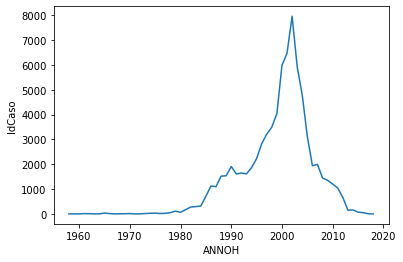

In [13]:
sns.lineplot(data=df_desaparicion.groupby("ANNOH").agg({"IdCaso" : "count"}).reset_index(), x="ANNOH", y="IdCaso")

<AxesSubplot:xlabel='ANNOH'>

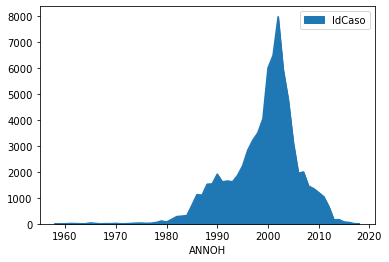

In [20]:
df_desaparicion.groupby(["ANNOH"]).agg({"IdCaso" : "count"}).reset_index().plot.area(x="ANNOH", y="IdCaso")

In [38]:
df_desaparicion.DEPTO_CASO.value_counts()

Antioquia                                                   19794
Meta                                                         5280
Magdalena                                                    3906
Valle del cauca                                              3874
Cesar                                                        3755
Santander                                                    3661
Caquetá                                                      3290
Norte de santander                                           2980
Putumayo                                                     2928
Bolívar                                                      2812
Córdoba                                                      2714
Nariño                                                       2292
Guaviare                                                     1794
Caldas                                                       1691
Arauca                                                       1688
Tolima    

In [43]:
df_desaparicion_depto = df_desaparicion[df_desaparicion.DEPTO_CASO.isin(["Antioquia", "Meta", "Magdalena", "Valle del cauca"])].groupby(["ANNOH", "DEPTO_CASO"]).agg({"IdCaso" : "count"}).reset_index()\
    .pivot_table("IdCaso", "DEPTO_CASO", "ANNOH", fill_value=0)
df_desaparicion_depto

ANNOH,1961,1962,1964,1965,1966,1967,1968,1970,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
DEPTO_CASO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Antioquia,0,9,1,22,6,1,1,8,0,7,5,3,9,7,16,19,23,10,65,81,61,119,224,276,399,370,521,440,467,515,686,870,1198,1134,1143,1040,1409,1343,1525,1069,905,670,391,331,277,417,454,409,124,12,9,5,7,0,1
Magdalena,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,2,4,0,4,2,11,28,37,37,44,45,52,66,74,50,48,105,159,188,270,412,472,500,455,311,172,53,49,28,21,12,6,9,2,5,2,0,0,0
Meta,3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,3,4,11,5,10,9,32,68,72,91,90,104,125,143,143,143,115,118,183,232,251,302,358,591,477,441,330,164,186,100,80,62,38,28,4,6,1,1,0,0
Valle del cauca,0,1,0,0,2,0,0,0,1,1,0,1,1,1,2,5,4,6,13,6,15,71,68,41,49,105,156,147,96,96,78,67,59,45,60,124,285,208,297,234,275,188,169,231,162,134,92,70,61,18,13,6,2,6,0


In [36]:
df_desaparicion_depto.columns

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 7, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 6, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

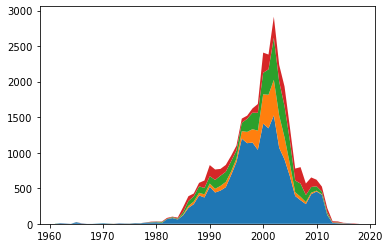

In [44]:
plt.stackplot(df_desaparicion_depto.columns, df_desaparicion_depto.values)

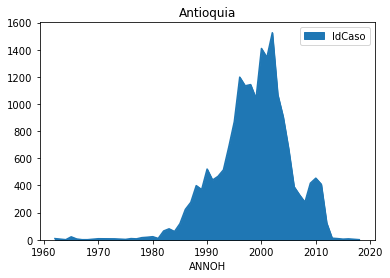

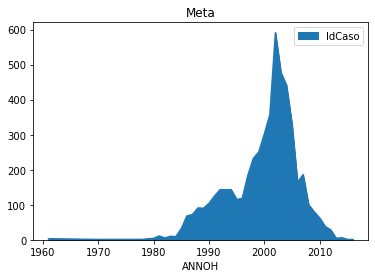

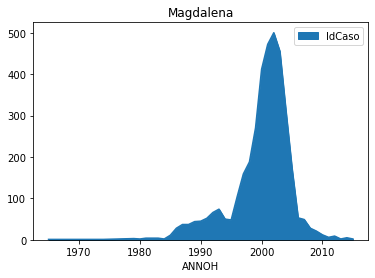

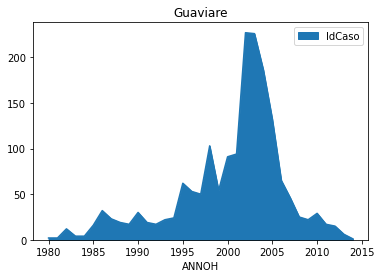

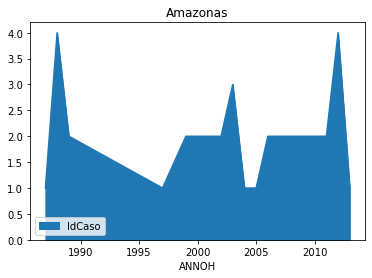

In [48]:
for depto in ["Antioquia", "Meta", "Magdalena", "Guaviare", "Amazonas"]:
    df_desaparicion[df_desaparicion.DEPTO_CASO == depto].groupby(["ANNOH"]).agg({"IdCaso" : "count"}) \
        .reset_index().plot.area(x="ANNOH", y="IdCaso")
    plt.title(depto)

In [89]:
pd.cut(df_desaparicion.ANNOH, [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], right=False).value_counts()

[2000, 2010)    41003
[1990, 2000)    24459
[1980, 1990)     7126
[2010, 2020)     3350
[1970, 1980)      299
[1960, 1970)       97
[1950, 1960)        5
Name: ANNOH, dtype: int64

In [262]:
top_municipios = df_desaparicion.groupby("COD_DANE_MUN").size()[df_desaparicion.groupby("COD_DANE_MUN").size() > 300].index.values
len(top_municipios)

52

In [263]:
df_desaparicion_mun = df_desaparicion[df_desaparicion.COD_DANE_MUN.isin(top_municipios)].groupby([
    pd.cut(df_desaparicion[df_desaparicion.COD_DANE_MUN.isin(top_municipios)].ANNOH, [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], right=False), 
    "COD_DANE_MUN"]) \
    .agg({"IdCaso": "count"}) \
    .pivot_table("IdCaso", "COD_DANE_MUN", "ANNOH")
df_desaparicion_mun = df_desaparicion_mun / df_desaparicion_mun.sum(axis=1).values.reshape(-1, 1)
df_desaparicion_mun

ANNOH,"[1950, 1960)","[1960, 1970)","[1970, 1980)","[1980, 1990)","[1990, 2000)","[2000, 2010)","[2010, 2020)"
COD_DANE_MUN,,,,,,,
5001,0.00000,0.004190,0.003142,0.070531,0.250349,0.474511,0.197277
5045,0.00000,0.000000,0.010369,0.124424,0.567972,0.282258,0.014977
5088,0.00000,0.000000,0.000000,0.064846,0.300341,0.440273,0.194539
5154,0.00000,0.000000,0.000000,0.068345,0.348921,0.519784,0.062950
5172,0.00000,0.000000,0.006897,0.128736,0.618391,0.236782,0.009195
5234,0.00000,0.001799,0.000000,0.028777,0.525180,0.437050,0.007194
5480,0.00000,0.000000,0.018561,0.102088,0.654292,0.222738,0.002320
5490,0.00000,0.002833,0.008499,0.147309,0.637394,0.198300,0.005666
5579,0.00000,0.002475,0.008663,0.279703,0.360149,0.327970,0.021040


In [264]:
df_mun_names = df_desaparicion.groupby(["COD_DANE_MUN"]).agg({"MUNINICIO_CASO": "min", "DEPTO_CASO": "min"})
def concatenate_mun(row):
    mun = "Desconocido" if isinstance(row["MUNINICIO_CASO"], float) else row["MUNINICIO_CASO"]
    mun = mun.title()
    depto = row["DEPTO_CASO"].title()
    return mun + ", " + depto
df_mun_names["MUNICIPIO"] = df_mun_names.apply(concatenate_mun, axis="columns")
df_mun_names

,MUNINICIO_CASO,DEPTO_CASO,MUNICIPIO
COD_DANE_MUN,,,
5000,NaN,Antioquia,"Desconocido, Antioquia"
5001,Medellín,Antioquia,"Medellín, Antioquia"
5002,Abejorral,Antioquia,"Abejorral, Antioquia"
5004,Abriaquí,Antioquia,"Abriaquí, Antioquia"
5021,Alejandría,Antioquia,"Alejandría, Antioquia"
...,...,...,...
99000,NaN,Vichada,"Desconocido, Vichada"
99001,Puerto carreño,Vichada,"Puerto Carreño, Vichada"
99524,La primavera,Vichada,"La Primavera, Vichada"


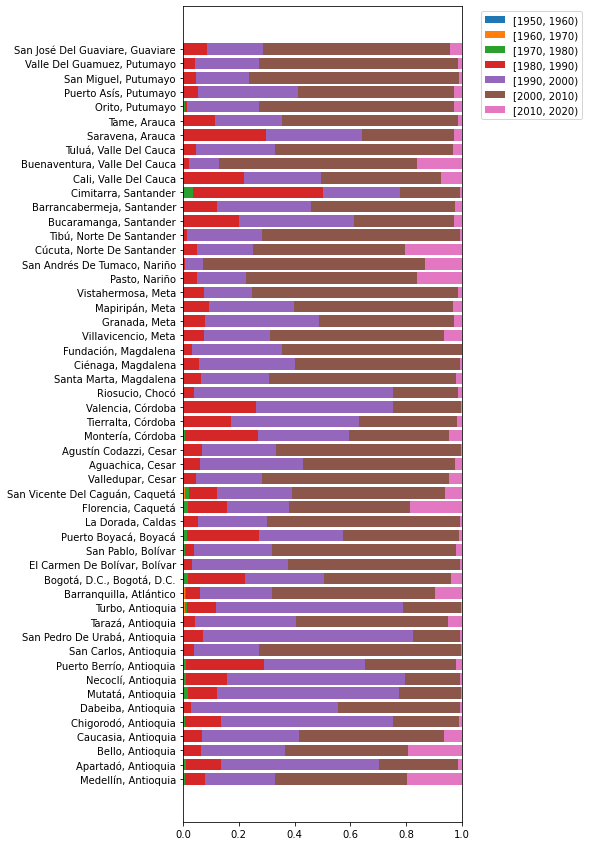

In [266]:
fig, ax = plt.subplots(figsize=(5, 15))
left = np.zeros((len(df_desaparicion_mun),))
labels = df_desaparicion_mun.index.to_series().map(df_mun_names["MUNICIPIO"])
for i in range(len(df_desaparicion_mun.columns)):
    ax.barh(labels, df_desaparicion_mun.iloc[:, i].values, left=left)
    left = left + df_desaparicion_mun.iloc[:, i].values
plt.legend(df_desaparicion_mun.columns, bbox_to_anchor=(1.05, 1))

In [268]:
!pip install sklearn

Processing c:\users\juanj\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-0.17.0-py3-none-any.whl (301 kB)


In [279]:
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_desaparicion_mun.values)
kmeans_labels = kmeans.predict(df_desaparicion_mun.values)

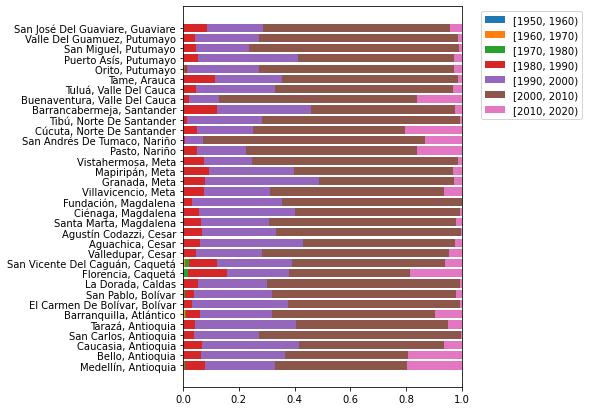

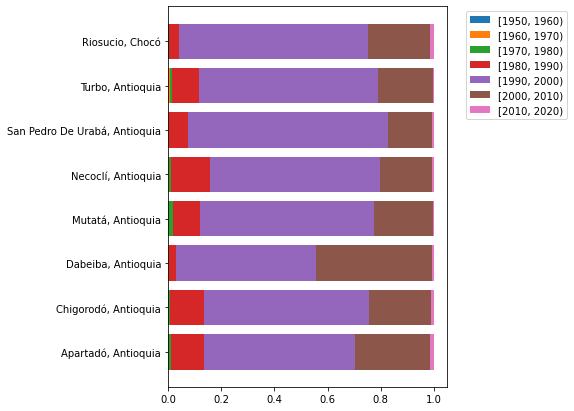

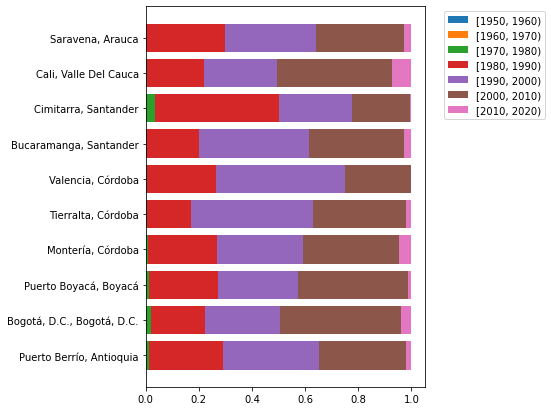

In [280]:
for cluster in range(n_clusters):
    fig, ax = plt.subplots(figsize=(5, 7))
    left = np.zeros((len(df_desaparicion_mun[kmeans_labels==cluster]),))
    labels = df_desaparicion_mun[kmeans_labels==cluster].index.to_series().map(df_mun_names["MUNICIPIO"])
    for i in range(len(df_desaparicion_mun.columns)):
        ax.barh(labels, df_desaparicion_mun[kmeans_labels==cluster].iloc[:, i].values, left=left)
        left = left + df_desaparicion_mun[kmeans_labels==cluster].iloc[:, i].values
    plt.legend(df_desaparicion_mun.columns, bbox_to_anchor=(1.05, 1))